# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [49]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
# print('Using TensorFlow version', tf.__version__)

(setup Tensorflow & teras.mnist  Environment)
open anaconda promt:

(base) PS C:\Users\PC> conda --version  
conda 23.7.4  
(base) PS C:\Users\PC> conda create --name testenv  
Proceed ([y]/n)? y  
(base) PS C:\Users\PC> conda activate testenv  
(testenv) PS C:\Users\PC> conda install -c conda-forge tensorflow  
Proceed ([y]/n)? y  
(testenv) PS C:\Users\PC> python -m ipykernel install --user --name=testenv  
Installed kernelspec testenv in C:\Users\PC\AppData\Roaming\jupyter\kernels\testenv  
(testenv) PS C:\Users\PC>    

**In VS Code > select kernel > jupyter kernel > testnev(Python 3.7.12)  


conda update -n base -c defaults conda



# Task 2: The Dataset
### Import MNIST

In [50]:
from tensorflow.keras.datasets import mnist
# returns training & test data Both
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# training dataset --> the data we want to use to train our neural network
# test dataset --> use to validate our trained neural network
# x_train, y_train , x_test, y_test --> variables are all numpy arrays 
# numpy --> a scientific computing pakage of python --> popular for machine learning developers
# (x_train, y_train), (x_test, y_test) --> these are multi dimentional arrays

### Shapes of Imported Arrays

In [51]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


x_train shape: (60000, 28, 28) --> 1st axis: no of examples , 2nd: no of rows, 3rd: no columns  
--> we have 60000 examples,  
--> each example has --> 28 rows, 28 columns    
  
y_train shape:  (60000,) --> there are 60000 classes for examples  
x_test shape:  (10000, 28, 28)  
y_test shape:  (10000,)  

### Plot an Image Example

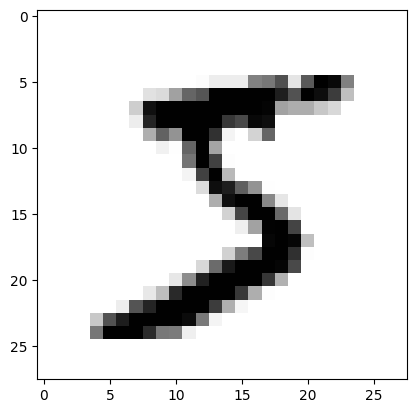

In [52]:
from matplotlib import pyplot as plt
# open Anaconda Promt > power shell > conda activate testenv > pip install matplotlib
%matplotlib inline
# make sure image is within notebook
plt.imshow( x_train[0], cmap='binary')
# show 1st training image & 
# set ColorMap binary --> because all dataset images Black & White
plt.show()

### Display Labels

In [53]:
y_train[0]
# show label of 1st training data

5

In [54]:
print( set(y_train) )
# show only unique Labels
# set() --> only unique vlaues are kept of list

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [55]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [56]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)
# we made every single label a 10 dimentional vector
# y_train_encoded shape: (60000, 10)
# y_test_encoded shape: (10000, 10)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [57]:
# now we will predict which swich is on? among 10 labels instead of predicting a value
# this is why it's a classification problem --> more of a regression problem
y_train_encoded[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?
y_train --> 60000,28,28 -->each example 28*28 = 784 features   
each feature has a corresponding weight which is multiplied by the feature value.In this case it's pixel value. And add it together it gives us a y. 

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [58]:
# now we have : 28 row & 28 cols
# we will change it to 784 dimentional vector
# each value in this vector corresponds to a pixel value in our image
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784) )
x_test_reshaped = np.reshape(x_test, (10000, 784) )

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [59]:
print( set(x_train_reshaped[0]) )
# all the unique values available at 1st example


{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [60]:
x_mean = np.mean( x_train_reshaped )
x_std = np.std( x_train_reshaped )

epsilon = 1e-10
x_train_norm = (x_train_reshaped-x_mean) / (x_std + epsilon)
# for very small of standard deviation will lead to unstability in computations and adding another small value (epsilon) solves the problem if it exists.
x_test_norm = (x_test_reshaped-x_mean) / (x_std + epsilon)


### Display Normalized Pixel Values

In [61]:
print( set(x_train_norm[0]) )

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,) ),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# Sequential -->input layers = just your examples
# Dense(128, activation='relu', input_shape=(784,1) ) --> create a hidden layer with 128 nodes
# Dense(128, activation='relu') --> output of Previous layer --> input of this layer
# Dense(10, activation='softmax') --> output layer: 10 nodes & softmax activation function --> probability of various classes given the input
# class with highest probability gives us our prediction




### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [63]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# sgd = optimization function --> Stochastic gradient descent 

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [64]:
model.fit(x_train_norm, y_train_encoded, epochs=3)
# we are going through all the training examples 3 times (epochs= iteraions)


Epoch 1/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3562 - acc: 0.8952
Epoch 2/3
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1769 - acc: 0.9483
Epoch 3/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1332 - acc: 0.9616


### Evaluating the Model

In [65]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy*100)


10000/10000 [==============================] - 0s 24us/sample - loss: 0.1301 - acc: 0.9588
Test set accuracy: 95.88000178337097


# Task 8: Predictions

### Predictions on Test Set

In [66]:
preds = model.predict(x_test_norm)
print("Shape of preds:", preds.shape)

Shape of preds: (10000, 10)


### Plotting the Results

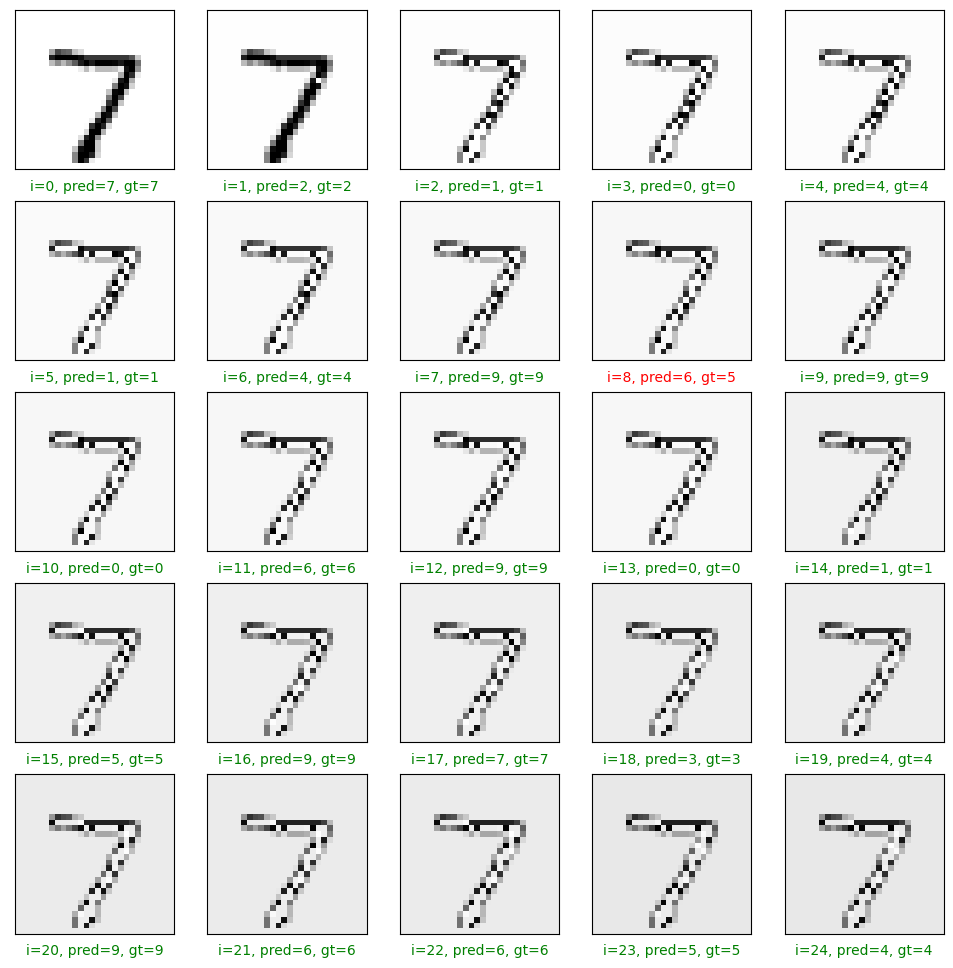

In [68]:
plt.figure(figsize=(12,12))

start_index=0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]

    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel( 'i={}, pred={}, gt={}'.format( start_index+i, pred, gt) , color=col )
    plt.imshow(x_test[start_index]+i, cmap='binary')
plt.show()

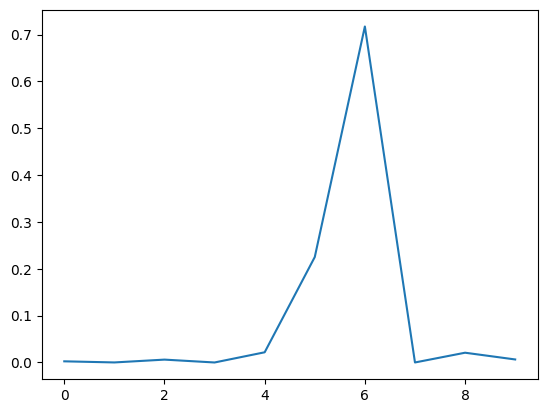

In [69]:
plt.plot(preds[8])
plt.show()